# 关于 单一BGM适用于什么类型的短视频 的分析

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 设置matplotlib画图的中文显示
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
# 导入数据文件
io = "../../data/DataOfBGMAndVedio.xlsx"

In [3]:
# 获取BGM数据
BGM = pd.read_excel(io,sheet_name = 0,index_col= 'ID')

In [4]:
BGM

,音乐,时长,使用人数,地址
ID,,,,
1,夏天的风,32s,223.3w,https://v.douyin.com/JNDAbTd/
2,想见你想见你想见你,37s,199.3w,https://v.douyin.com/JNfUQby/


#### 采用随机抽样的方式在热门短视频中抽取数据

In [5]:
# 获取Vedio数据
vedio = pd.read_excel(io,sheet_name= 1,index_col= 'ID')

In [6]:
vedio.head()

,地址,时间,点赞,评论量,转发,BGMId,tag1,tag2,tag3,tag4,tag5
ID,,,,,,,,,,,
1,https://v.douyin.com/JNAtAT7/,2020.05.11,2107000,116000,62000,1,夏天,校园,晒衣服,宿舍,返校
2,https://v.douyin.com/JNAqoaC/,2020.05.16,615000,103000,30000,1,女儿,幸福,可爱,父爱,爱情
3,https://v.douyin.com/JNAaVv8/,2020.05.11,28000,5109,345,1,学习,人生,工作,羡慕,行政大厅
4,https://v.douyin.com/JNAs4a9/,2020.06.30,20000,1310,165,1,夏天,美女,精致,美景,NaN
5,https://v.douyin.com/JNA4NAU/,2020.05.02,8289,1660,256,1,美女,美食,广东,夜晚,夏天


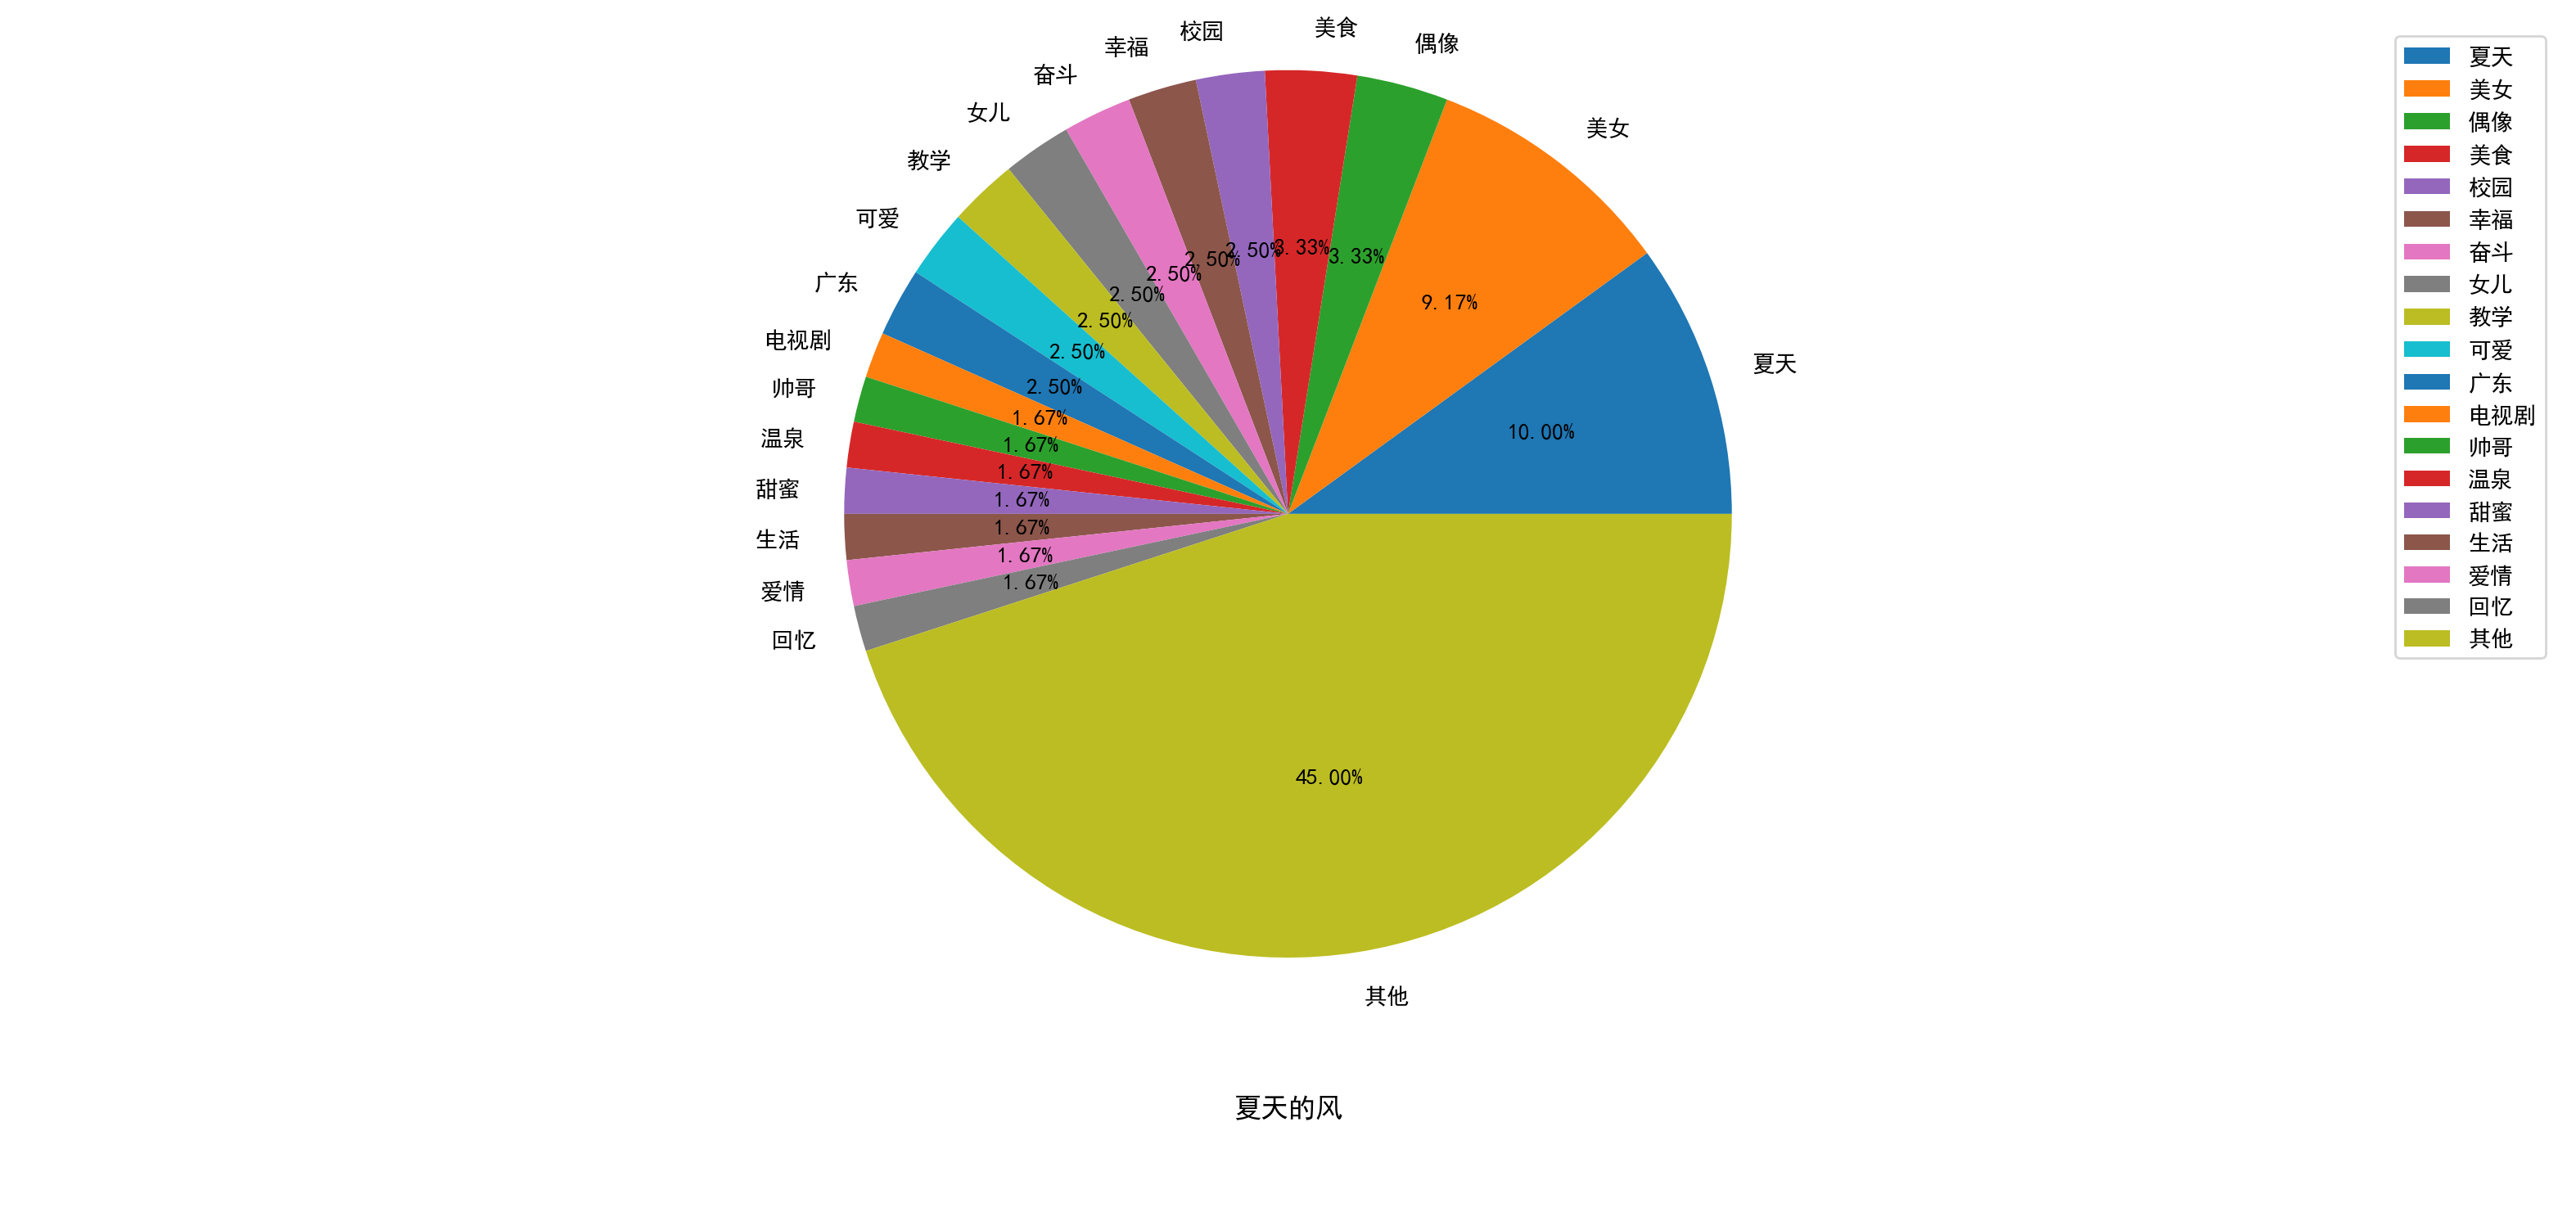

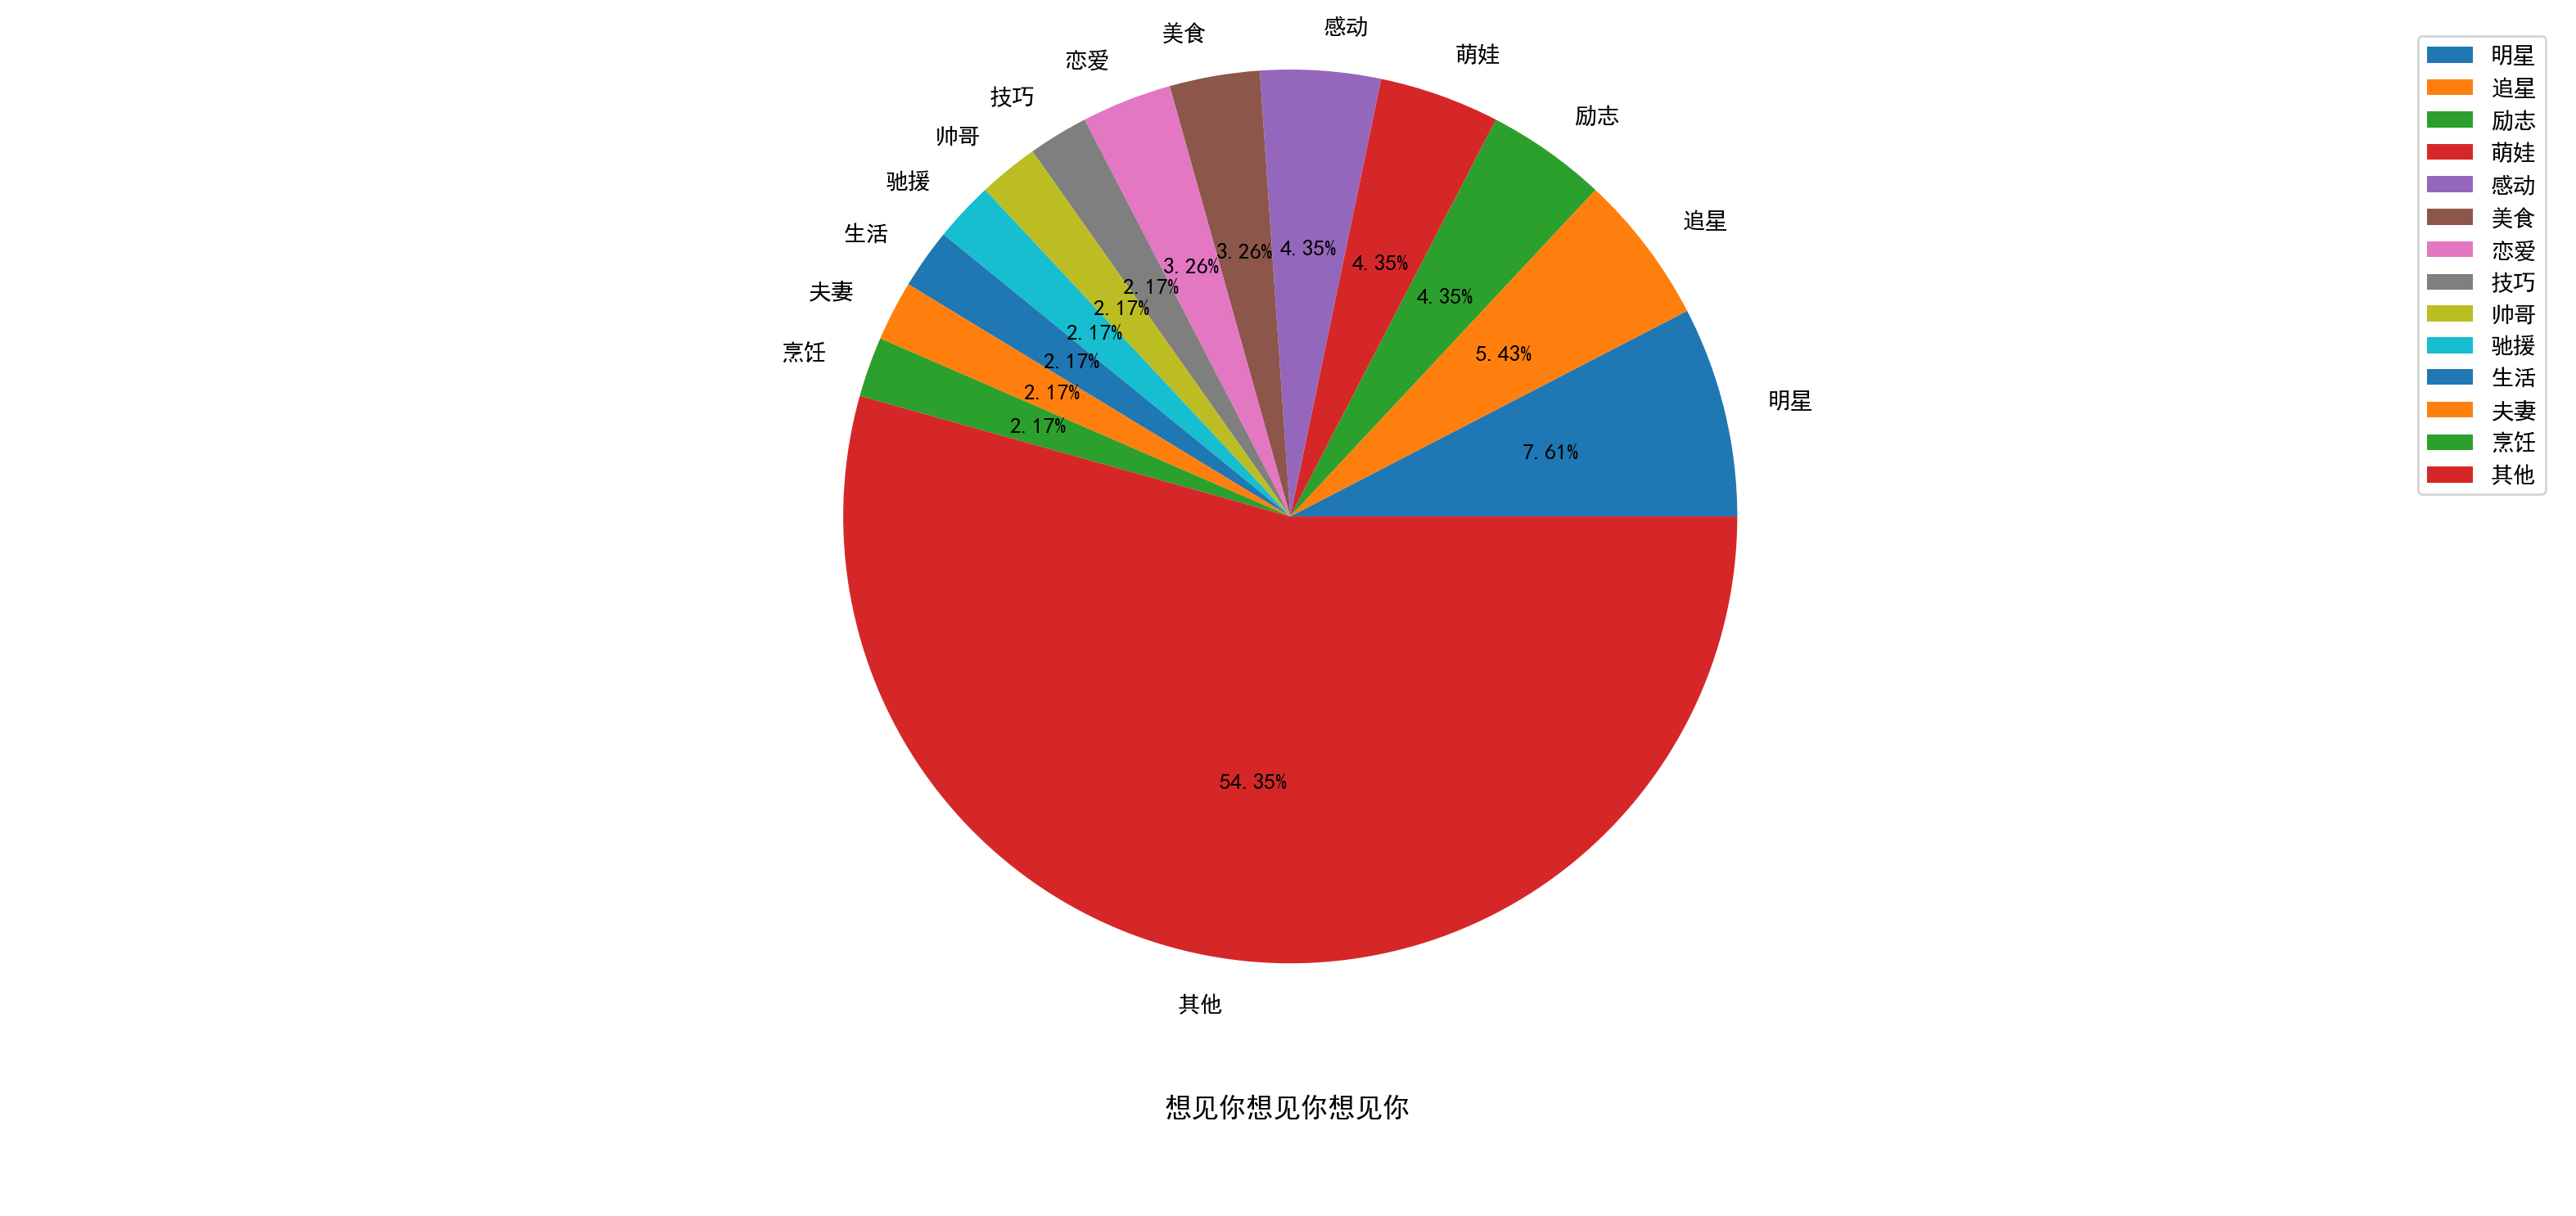

In [37]:
# 对各BGM的短视频的tag进行统计

for i in range(1,len(BGM)+1):
    targetVedio = vedio[vedio["BGMId"]==i]
    countOfTag = pd.concat([targetVedio["tag1"],targetVedio["tag2"],targetVedio["tag3"],targetVedio["tag4"],targetVedio["tag5"]],
                           ignore_index=True).dropna().value_counts()
    
    # 将只出现一次的tag归类到其他
    other = countOfTag[countOfTag == 1]
    countOfTag = countOfTag[countOfTag != 1]
    countOfTag["其他"]=len(other)
    
    # 画图
    plt.figure(figsize=(20,8),dpi=200)
    plt.pie(countOfTag.values,labels=countOfTag.index,autopct="%1.2f%%")
    plt.legend()
    plt.axis('equal')
    plt.title(BGM.iloc[i-1]['音乐']+'\n\n\n',fontsize='large',y=-0.2)
    plt.show()
    
    # 分割多图
    print()
    print()
